In [1]:
import sys
sys.path.insert(0,'src')
sys.path.insert(0,'data')
sys.path.insert(0,'upload_data')
import geopandas as gpd
import pandas as pd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
census_fp = '../upload_data/sd_population.csv'
census =  pd.read_csv(census_fp)

In [4]:
areas = gpd.read_file('http://seshat.datasd.org/sde/pd/pd_beats_datasd.zip')

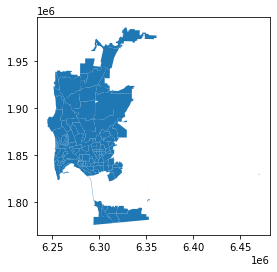

In [5]:
areas.plot()

In [6]:
areas = areas.drop(['objectid', 'name'],axis = 1)
areas

,beat,div,serv,geometry
0,935,9,930,"MULTIPOLYGON (((6268975.465 1931147.469, 62689..."
1,0,0,0,"MULTIPOLYGON (((6261648.576 1836846.672, 62616..."
2,511,5,510,"MULTIPOLYGON (((6261640.429 1836823.561, 62616..."
3,722,7,720,"POLYGON ((6302781.000 1793246.001, 6302905.000..."
4,314,3,310,"POLYGON ((6284667.652 1874418.895, 6284694.392..."
...,...,...,...,...
135,243,2,240,"POLYGON ((6295777.084 1908435.558, 6295790.126..."
136,937,9,930,"POLYGON ((6295209.132 1952772.422, 6295208.647..."
137,936,9,930,"POLYGON ((6287497.113 1936631.116, 6287462.453..."
138,233,2,230,"POLYGON ((6306176.245 1943421.146, 6306158.416..."


In [7]:
areas.dtypes

beat           int64
div            int64
serv           int64
geometry    geometry
dtype: object

In [8]:
census

,YEAR,beat,serv,Total,W,H,B,N,A,U & P,O,Two or More Races
0,2010,111,110,25358,15779,5866,1346,166,3882,147,2379,1659
1,2010,112,110,9785,8018,1247,162,67,680,32,382,444
2,2010,113,110,11966,9442,2340,160,81,660,36,977,610
3,2010,114,110,14870,10251,3715,259,115,1580,66,1773,826
4,2010,115,110,49029,28823,4690,790,90,15554,86,1582,2104
...,...,...,...,...,...,...,...,...,...,...,...,...
120,2010,933,930,6585,5693,360,46,15,525,5,62,239
121,2010,934,930,43817,29950,3206,343,68,10994,36,620,1806
122,2010,935,930,4836,3446,404,54,10,1038,3,57,228
123,2010,936,930,4163,2390,476,121,5,1268,7,151,221


In [9]:
heat = areas.merge(census, on=['beat','serv'],how = 'outer')

In [10]:
heat

,beat,div,serv,geometry,YEAR,Total,W,H,B,N,A,U & P,O,Two or More Races
0,935,9,930,"MULTIPOLYGON (((6268975.465 1931147.469, 62689...",2010.0,4836.0,3446.0,404.0,54.0,10.0,1038.0,3.0,57.0,228.0
1,0,0,0,"MULTIPOLYGON (((6261648.576 1836846.672, 62616...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,511,5,510,"MULTIPOLYGON (((6261640.429 1836823.561, 62616...",2010.0,16576.0,9186.0,5778.0,2734.0,238.0,907.0,96.0,2525.0,890.0
3,511,5,510,"POLYGON ((6283949.000 1837581.000, 6284299.000...",2010.0,16576.0,9186.0,5778.0,2734.0,238.0,907.0,96.0,2525.0,890.0
4,722,7,720,"POLYGON ((6302781.000 1793246.001, 6302905.000...",2010.0,15965.0,7705.0,11429.0,657.0,139.0,2150.0,80.0,4445.0,789.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,243,2,240,"POLYGON ((6295777.084 1908435.558, 6295790.126...",2010.0,5217.0,3697.0,1049.0,505.0,63.0,245.0,34.0,323.0,350.0
136,937,9,930,"POLYGON ((6295209.132 1952772.422, 6295208.647...",2010.0,6653.0,4561.0,649.0,218.0,13.0,1231.0,11.0,181.0,438.0
137,936,9,930,"POLYGON ((6287497.113 1936631.116, 6287462.453...",2010.0,4163.0,2390.0,476.0,121.0,5.0,1268.0,7.0,151.0,221.0
138,233,2,230,"POLYGON ((6306176.245 1943421.146, 6306158.416...",2010.0,46380.0,27295.0,4460.0,1144.0,149.0,13723.0,138.0,1168.0,2763.0


In [11]:
heat = heat.dropna()
heat

,beat,div,serv,geometry,YEAR,Total,W,H,B,N,A,U & P,O,Two or More Races
0,935,9,930,"MULTIPOLYGON (((6268975.465 1931147.469, 62689...",2010.0,4836.0,3446.0,404.0,54.0,10.0,1038.0,3.0,57.0,228.0
2,511,5,510,"MULTIPOLYGON (((6261640.429 1836823.561, 62616...",2010.0,16576.0,9186.0,5778.0,2734.0,238.0,907.0,96.0,2525.0,890.0
3,511,5,510,"POLYGON ((6283949.000 1837581.000, 6284299.000...",2010.0,16576.0,9186.0,5778.0,2734.0,238.0,907.0,96.0,2525.0,890.0
4,722,7,720,"POLYGON ((6302781.000 1793246.001, 6302905.000...",2010.0,15965.0,7705.0,11429.0,657.0,139.0,2150.0,80.0,4445.0,789.0
5,314,3,310,"POLYGON ((6284667.652 1874418.895, 6284694.392...",2010.0,5184.0,3223.0,1199.0,502.0,57.0,663.0,36.0,340.0,363.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,243,2,240,"POLYGON ((6295777.084 1908435.558, 6295790.126...",2010.0,5217.0,3697.0,1049.0,505.0,63.0,245.0,34.0,323.0,350.0
136,937,9,930,"POLYGON ((6295209.132 1952772.422, 6295208.647...",2010.0,6653.0,4561.0,649.0,218.0,13.0,1231.0,11.0,181.0,438.0
137,936,9,930,"POLYGON ((6287497.113 1936631.116, 6287462.453...",2010.0,4163.0,2390.0,476.0,121.0,5.0,1268.0,7.0,151.0,221.0
138,233,2,230,"POLYGON ((6306176.245 1943421.146, 6306158.416...",2010.0,46380.0,27295.0,4460.0,1144.0,149.0,13723.0,138.0,1168.0,2763.0


In [14]:
heat.W.min()

1.0

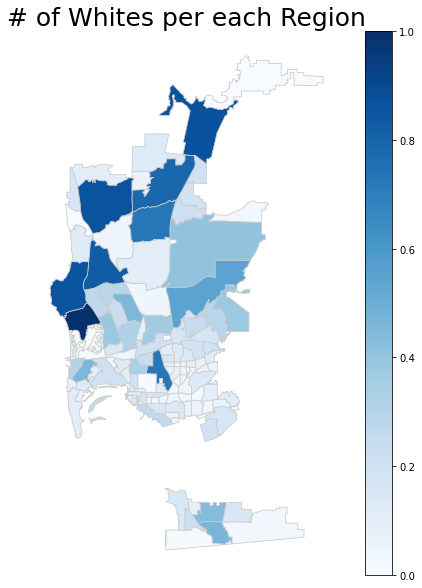

In [18]:
variable = 'W'
vmin, vmax = 0, 40000
fig, ax = plt.subplots(1, figsize=(10,10))
ax.axis('off')
ax.set_title('# of c per each Region', fontdict={'fontsize':'25','fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(sm)
heat.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In [27]:
def population_heat(table, race):
    vmin, vmax = 0, roundup(table[race].max())
    fig, ax = plt.subplots(1, figsize=(10,10))
    ax.axis('off')
    ax.set_title('# of {r} per each Region'.format(r = race), fontdict={'fontsize':'25','fontweight' : '3'})
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    fig.colorbar(sm)
    table.plot(column=race, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In [ ]:
def make_merged():
    census_fp = '../upload_data/sd_population.csv'
    census =  pd.read_csv(census_fp)
    areas = gpd.read_file('http://seshat.datasd.org/sde/pd/pd_beats_datasd.zip')
    areas = areas.drop(['objectid', 'name'],axis = 1)
    heat = areas.merge(census, on=['beat','serv'],how = 'outer')
    heat = heat.dropna()
    return heat

In [20]:
def roundup(x):
    return x if x % 100 == 0 else x + 100 - x % 100

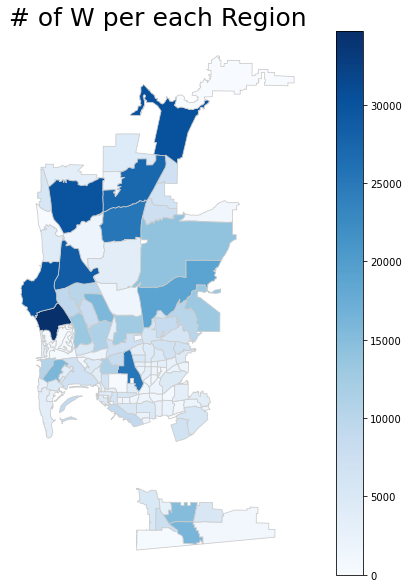

In [26]:
population_heat(heat,'W')